The Idea is to apply CNN to Cats&Dogs Image Classification dataset.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing import image
from zipfile import ZipFile 

In [2]:
# importing libraries for Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
#test_dir="../input/dogs-cats-images/dog vs cat/dataset/test_set"
#train_dir="../input/dogs-cats-images/dog vs cat/dataset/training_set"

test_dir="dataset/test_set"
train_dir="dataset/training_set"

train_dir_cats = train_dir + '/cats'
train_dir_dogs = train_dir + '/dogs'
test_dir_cats = test_dir + '/cats'
test_dir_dogs = test_dir + '/dogs'

In [4]:
print('number of cats training images - ',len(os.listdir(train_dir_cats)))
print('number of dogs training images - ',len(os.listdir(train_dir_dogs)))
print('number of cats testing images - ',len(os.listdir(test_dir_cats)))
print('number of dogs testing images - ',len(os.listdir(test_dir_dogs)))

number of cats training images -  4000
number of dogs training images -  4000
number of cats testing images -  1000
number of dogs testing images -  1000


Now we need to convert the RGB images into array of numbers. The requirement can be satisfied by ImageDataGenerator() https://keras.io/preprocessing/image/

In [5]:
data_generator = ImageDataGenerator(rescale = 1.0/255.0, zoom_range = 0.2)

In [6]:
batch_size = 32
training_data = data_generator.flow_from_directory(directory = train_dir,
                                                   target_size = (64, 64),
                                                   batch_size = batch_size,
                                                   class_mode = 'binary')
testing_data = data_generator.flow_from_directory(directory = test_dir,
                                                  target_size = (64, 64),
                                                  batch_size = batch_size,
                                                  class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [7]:
# preparing the layers in the Convolutional Deep Neural Network
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = training_data.image_shape))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.3))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.2))

model.add(Conv2D(filters = 126, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.15))

model.add(Flatten())

model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(rate = 0.15))

model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = 0.1))

model.add(Dense(units = len(set(training_data.classes)), activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 126)       7

In [9]:
fitted_model = model.fit_generator(training_data,
                        steps_per_epoch = 5,
                        epochs = 5,
                        validation_data = testing_data,
                        validation_steps = 5)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 5 steps, validate for 5 steps
Epoch 1/5
5/5 [==============================] - 15s 3s/step - loss: 0.7010 - accuracy: 0.5000 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 2/5
5/5 [==============================] - 9s 2s/step - loss: 0.7120 - accuracy: 0.5063 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 3/5
5/5 [==============================] - 7s 1s/step - loss: 0.6998 - accuracy: 0.4625 - val_loss: 0.6932 - val_accuracy: 0.5125
Epoch 4/5
5/5 [==============================] - 8s 2s/step - loss: 0.6878 - accuracy: 0.5312 - val_loss: 0.6930 - val_accuracy: 0.4875
Epoch 5/5
5/5 [==============================] - 7s 1s/step - loss: 0.6967 - accuracy: 0.5000 - val_loss: 0.6928 - val_accuracy: 0.4812


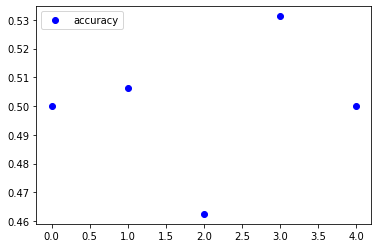

In [15]:
# plotting accuracy and validation accuracy
accuracy = fitted_model.history['accuracy']
plt.plot(range(len(accuracy)), accuracy, 'bo', label = 'accuracy')
plt.legend()

In [26]:
# testing the model
def testing_image(image_directory):
    test_image = image.load_img(image_directory, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(x = test_image)
    print(result)
    print(result[0][0])
    print(result[0][1])
    if result[0][0]  == 1:
        prediction = 'Dog'
    else:
        prediction = 'Cat'
    return prediction

In [27]:
print(testing_image(test_dir + '/cats/cat.4003.jpg'))

[[0.03069333 0.9693067 ]]
0.030693332
0.9693067
Cat


In [20]:
result[0][0]

NameError: name 'result' is not defined

In [19]:
print(testing_image(test_dir + '/dogs/dog.4003.jpg'))

[[0.00301377 0.9969862 ]]
Cat
